## Load libraries

In [1]:
from main import MnistClassifier
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

## Load MINST dataset

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

### Visualization of elements in MNIST dataset

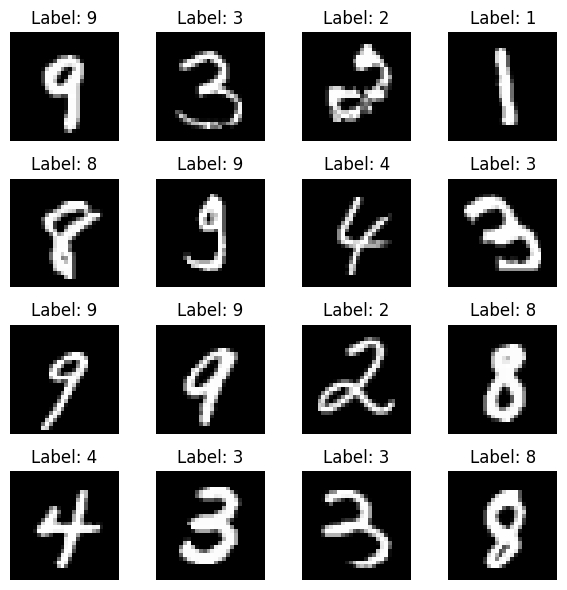

In [17]:
# Set the number of images to display
num_images = 16  # 4x4 grid

# Select random images
indices = np.random.choice(x_train.shape[0], num_images, replace=False)
selected_images = x_train[indices]
selected_labels = y_train[indices]

# Create a grid for visualization
grid_size = int(np.sqrt(num_images))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i], cmap='gray')
    ax.set_title(f"Label: {selected_labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## Loading and training of created classification models

### Random forest classification model

In [20]:
rf_classifier = MnistClassifier('rf')

In [ ]:
# Train Random Forest model with n_estimators=5
rf_classifier.train(x_train, y_train, criterion='entropy', n_estimators=5)

In [28]:
# Using train model to predict test values
rf_y_pred = rf_classifier.predict(x_test)

In [29]:
print(f"The accuracy of RF model (n_estimators=5): {accuracy_score(y_test, rf_y_pred)}")

The accuracy of RF model (n_estimators=5): 0.927


In [8]:
def conf_matrix_heatmap(y_test, y_pred):
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                fmt='.0f', 
                annot=True)
    plt.title("Confusion matrix")
    plt.show()

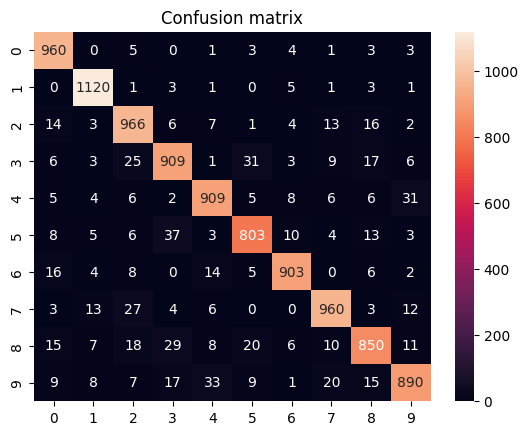

In [ ]:
# Visualization of test results
conf_matrix_heatmap(y_test, rf_y_pred)

In [32]:
# Train Random Forest model with n_estimators=10
rf_classifier_10 = MnistClassifier('rf')
rf_classifier_10.train(x_train, y_train, criterion='entropy', n_estimators=10)

In [33]:
# Using train model to predict test values
rf_y_pred_10 = rf_classifier_10.predict(x_test)

In [34]:
print(f"The accuracy of RF model (n_estimators=10): {accuracy_score(y_test, rf_y_pred_10)}")

The accuracy of RF model (n_estimators=10): 0.9492


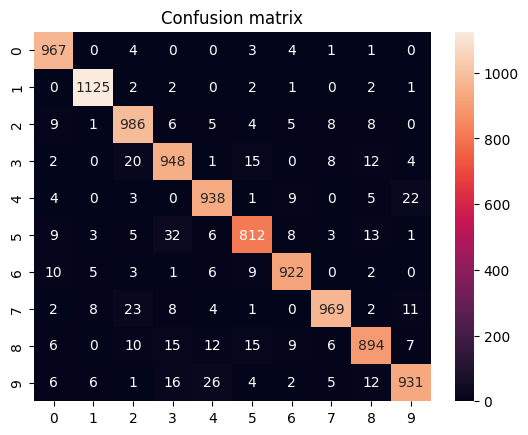

In [56]:
# Visualization of test results
conf_matrix_heatmap(y_test, rf_y_pred_10)

As we can see the higher number of estimators in RF the higher is accuracy

### Feed-Forward Neural Network

In [59]:
# Initialization of NN model
nn_model = MnistClassifier('nn')

In [60]:
untrained_prediction = nn_model.predict(x_test)
accuracy_score(y_test, untrained_prediction)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.1319

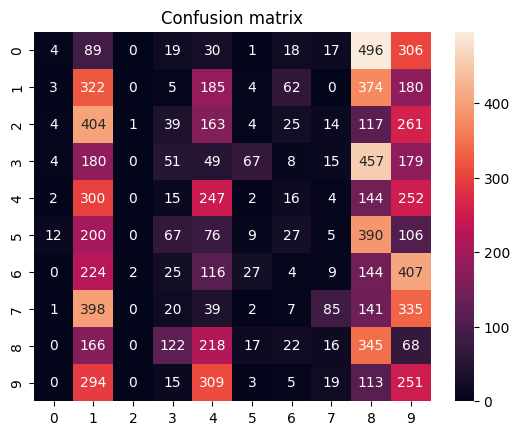

In [61]:
conf_matrix_heatmap(y_test, untrained_prediction)

Untrained NN model shows results that are equivalent to random guessing 

In [62]:
# Train NN classification model
nn_model.train(x_train, y_train)

Epoch 1/5
469/469 - 7s - 15ms/step - accuracy: 0.9353 - loss: 0.2243
Epoch 2/5
469/469 - 7s - 14ms/step - accuracy: 0.9754 - loss: 0.0812
Epoch 3/5
469/469 - 10s - 21ms/step - accuracy: 0.9834 - loss: 0.0518
Epoch 4/5
469/469 - 10s - 21ms/step - accuracy: 0.9886 - loss: 0.0361
Epoch 5/5
469/469 - 10s - 22ms/step - accuracy: 0.9908 - loss: 0.0277


In [63]:
nn_y_pred = nn_model.predict(x_test)
accuracy_score(y_test, nn_y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.9768

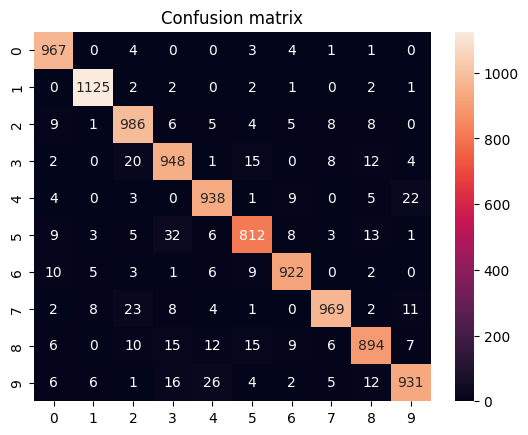

In [64]:
# Visualization of test results
conf_matrix_heatmap(y_test, rf_y_pred_10)

### Convolutional Neural Network

In [2]:
cnn = MnistClassifier('cnn')

In [6]:
untrained_cnn_pred = cnn.predict(x_test)
accuracy_score(y_test, untrained_cnn_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


0.1273

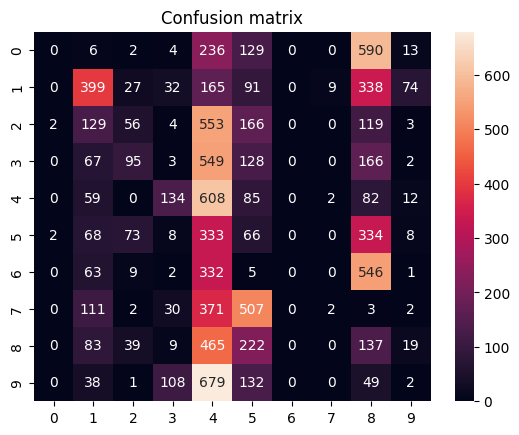

In [9]:
conf_matrix_heatmap(y_test, untrained_cnn_pred)

In [10]:
cnn.train(x_train, y_train)

Epoch 1/5
469/469 - 25s - 54ms/step - accuracy: 0.9305 - loss: 0.6328
Epoch 2/5
469/469 - 21s - 44ms/step - accuracy: 0.9817 - loss: 0.0605
Epoch 3/5
469/469 - 39s - 84ms/step - accuracy: 0.9880 - loss: 0.0393
Epoch 4/5
469/469 - 18s - 38ms/step - accuracy: 0.9904 - loss: 0.0311
Epoch 5/5
469/469 - 19s - 42ms/step - accuracy: 0.9917 - loss: 0.0256


In [11]:
cnn_y_pred = cnn.predict(x_test)
accuracy_score(y_test, cnn_y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


0.9846

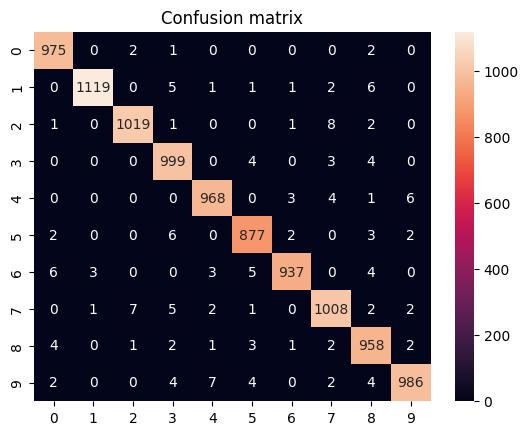

In [12]:
conf_matrix_heatmap(y_test, cnn_y_pred)

From the code above, we can see that all three models work as expected and perform well in classification. As expected, the best results are shown by the cnn model.    